# Launch Multiple FDS Jobs with Multi-Processing


In [2]:
import os
import subprocess
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import multiprocessing as mp

# Add a local script from different folder as working directory.
# Note: Ehe "__init__.py" is necessary for Python when locating distributed scripts.
sys.path.insert(0, os.path.join("GeneralInformation"))
from LaunchFDS import run_job

In [2]:
print('Package Versions')
print('----------------')
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))

Package Versions
----------------
Pandas version: 0.24.1
Numpy version: 1.15.4
Matplotlib version: 3.0.2


In [4]:
cwd = os.getcwd()
print("* Current working directory:")
print(' ', cwd)

* Current working directory:
  D:\Git\JupyterFDSLauncher


In [5]:
# Define general information needed within this notebook.

# The work directories for the simulations are provided as list 
# to easily switch between them.
sim_work_dir = [os.path.join(cwd, 'SomeFDSInput', 'Scenario01'),
                os.path.join(cwd, 'SomeFDSInput', 'Scenario02')]

# Directory used to collect the output produced by this notebook.
output_dir = os.path.join(cwd, "LaunchJobsFDS")
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    print("* Output directory created.")
else:
    print("* Output directory already exists.")

* Output directory created.


### Some User Input Required Here

In [44]:
# Flag, used to control if simulations ought to be conducted, or not.
run_simulations = True

# Set number of CPU cores to be used for simulation.
num_worker = 5

# Run Simulations

In [45]:
# Collect all the simulation input files with their paths.
job_paths = list()
scenario = sim_work_dir[1]

# Walk through the different sub directories and look for FDS input.
for path, subdirs, files in os.walk(scenario):
    for name in files:
        if '.fds' in name:
            # print(os.path.join(path, name))
            job_paths.append(os.path.join(path, name))

# Show one item to check if all is fine.
job_paths[0]

'D:\\Git\\JupyterFDSLauncher\\SomeFDSInput\\Scenario02\\FDS01\\tga_analysis.fds'

In [46]:
# Perform simulations of the provided files.
if run_simulations is True:
    
    print()
    print("*** Prepare to run simulations... ***")
    print()
    
    # Take sim file list to distribute to the workers.
    sim_list = job_paths

    # Set up pool with workers and distribute the jobs.
    pool = mp.Pool(processes=num_worker)
    pool.map(run_job, sim_list[:])

    print()
    print("*** Simulation process complete. ***")
    print()
    print()

else:
    print("* Automatic simulation not active. *")


*** Prepare to run simulations... ***


*** Simulation process complete. ***




# Analyse the Results

## Read Simulation Response

### Scenario 01

Just some simulations to have something to show. Feel free to adjust to your liking.

In [47]:
# Collect all the "*_devc.csv" files with their paths.
tga_scen01_paths = list()
scenario = sim_work_dir[0]

for path, subdirs, files in os.walk(scenario):
    for name in files:
        if '_tga.csv' in name:
#             print(os.path.join(path, name))
            tga_scen01_paths.append(os.path.join(path, name))
        
# Show a path as example.
tga_scen01_paths[0]

'D:\\Git\\JupyterFDSLauncher\\SomeFDSInput\\Scenario01\\FDS01\\tga_analysis_tga.csv'

In [48]:
# Collect the simulation responses as Pandas DataFrames.
tga_scen_01_data = list()

for path in tga_scen01_paths:
    df = pd.read_csv(path, header=1)
    tga_scen_01_data.append(df)

In [49]:
# Show one data frame to check if all worked well.
tga_scen_01_data[0].head()

,Time,Temp,Mass,MLR,MCC,DSC
0,12.0,21.000317,0.999627,0.000032,1.252688e-19,0.189221
1,24.0,22.000315,0.999239,0.000033,1.759232e-19,0.192155
2,36.0,23.000315,0.998837,0.000034,2.464945e-19,0.195164
3,48.0,24.000313,0.998419,0.000035,3.445921e-19,0.198248
4,60.0,25.000311,0.997985,0.000037,4.806483e-19,0.201406


### Scenario 02

Just some simulations to have something to show. Feel free to adjust to your liking.

**Note: Run the second batch of simulations by changing the scenario to "1" in "Run Simulations"!**

In [50]:
# Collect all the "*_devc.csv" files with their paths.
tga_scen02_paths = list()
scenario = sim_work_dir[1]

for path, subdirs, files in os.walk(scenario):
    for name in files:
        if '_tga.csv' in name:
#             print(os.path.join(path, name))
            tga_scen02_paths.append(os.path.join(path, name))
        
# Show a path as example.
tga_scen02_paths[0]

'D:\\Git\\JupyterFDSLauncher\\SomeFDSInput\\Scenario02\\FDS01\\tga_analysis_tga.csv'

In [51]:
# Collect the simulation responses as Pandas DataFrames.
tga_scen_02_data = list()

for path in tga_scen02_paths:
    df = pd.read_csv(path, header=1)
    tga_scen_02_data.append(df)

In [52]:
# Show one data frame to check if all worked well.
tga_scen_02_data[0].head()

,Time,Temp,Mass,MLR,MCC,DSC
0,12.0,21.000317,0.999627,0.000032,5.924180e-22,0.189221
1,24.0,22.000315,0.999239,0.000033,8.524605e-22,0.192155
2,36.0,23.000315,0.998837,0.000034,1.223638e-21,0.195164
3,48.0,24.000313,0.998419,0.000035,1.752165e-21,0.198248
4,60.0,25.000311,0.997985,0.000037,2.502944e-21,0.201406


## Plot Data

### Scenario 01

Number of data series: 5


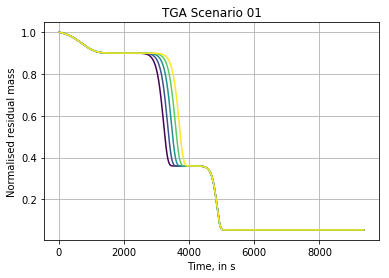

In [53]:
# Name the file to be created.
plot_file_name = 'TGA_Scenario_01.png'

# Scale color cycle by number of data sets to plot.
num_plots = len(tga_scen_01_data)
print('Number of data series: {}'.format(num_plots))
plt.gca().set_prop_cycle(plt.cycler('color',
                                    plt.cm.viridis(np.linspace(0, 1, num_plots))))

# Plot sim data.
for data in tga_scen_01_data:
    plt.plot(data.Time, data.Mass)
    
plt.grid()
plt.xlabel('Time, in s')
plt.ylabel('Normalised residual mass')
plt.title('TGA Scenario 01')

# Build file name and save.
pfn = os.path.join(output_dir, plot_file_name)
plt.savefig(pfn, dpi=320);

### Scenario 02

Number of data series: 5


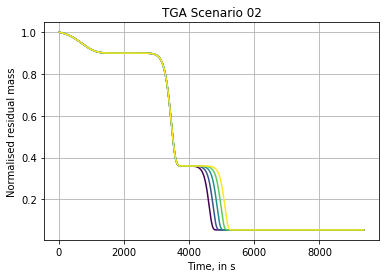

In [55]:
# Name the file to be created.
plot_file_name = 'TGA_Scenario_02.png'

# Scale color cycle by number of data sets to plot.
num_plots = len(tga_scen_02_data)
print('Number of data series: {}'.format(num_plots))
plt.gca().set_prop_cycle(plt.cycler('color',
                                    plt.cm.viridis(np.linspace(0, 1, num_plots))))

# Plot sim data.
for data in tga_scen_02_data:
    plt.plot(data.Time, data.Mass)
    
plt.grid()
plt.xlabel('Time, in s')
plt.ylabel('Normalised residual mass')
plt.title('TGA Scenario 02')

# Build file name and save.
pfn = os.path.join(output_dir, plot_file_name)
plt.savefig(pfn, dpi=320);